## K-Means with SciKit Learn

SciKit learn has a nice [implementaton of the k-means method](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans), which we'll use to cluster various artificial datasets first.

In [ ]:
import numpy as np

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')
# Create color maps
from matplotlib.colors import ListedColormap
cmap = ListedColormap(["#e41a1c","#984ea3","#a65628","#377eb8","#ffff33","#4daf4a","#ff7f00"])

## A first example

First, we'll create data using a function that generates [gaussian blobs](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs).

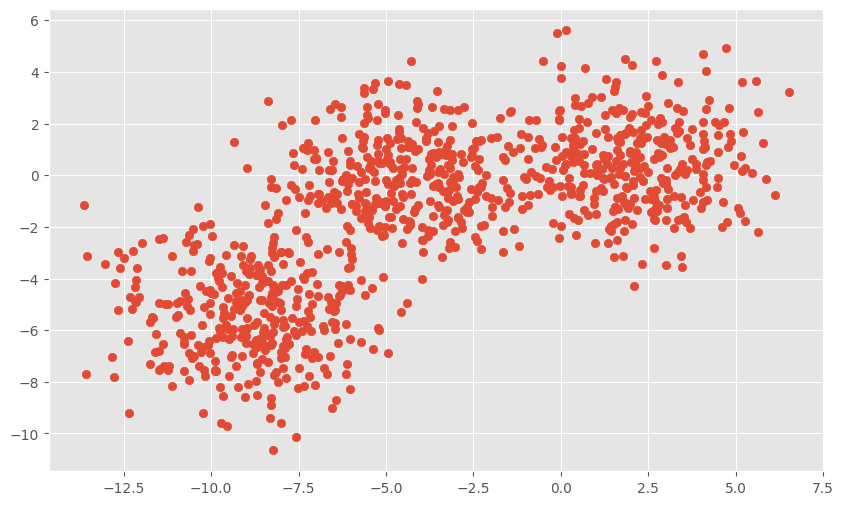

In [ ]:
# make_blobs generates gaussian blobs, we create 3 blobs
n_samples = 1000
random_state = 170
X, y = make_blobs(n_samples=n_samples, centers=3, cluster_std=1.8,random_state=random_state)

# plot data
plt.scatter(X[:, 0], X[:, 1],  marker="o");

If k-means is any good it should get this right!!!  

I will also assume I know a-priori that there are 3 clusters.

Now we run the scikit-learn KMeans implementation with function parameters
* `n_clusters`: $k=3$ clusters
* `n_init`: only one initialization
* `init`: random initialization
* `max_iter`: only one iteration



The clusters are plotted using color.

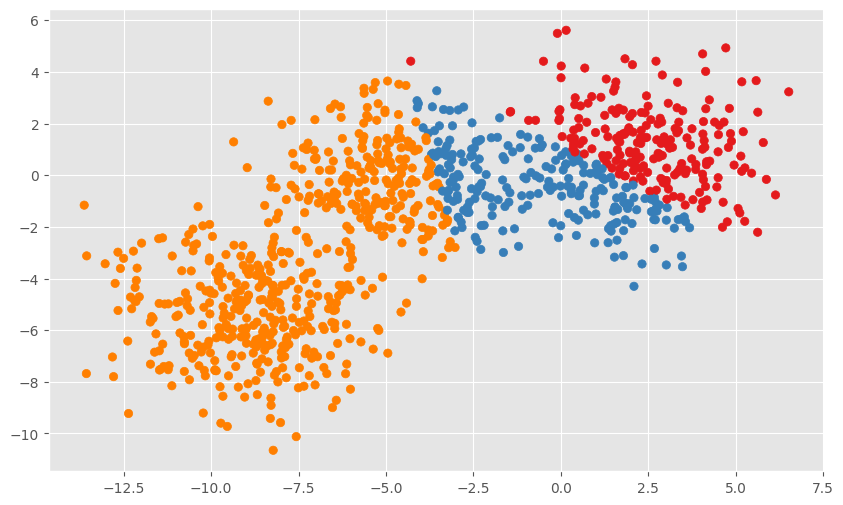

In [ ]:
y_pred = KMeans(n_clusters=3, n_init=1, init='random', max_iter=1).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=cmap);

**Note:** that this is the dumbest possible version of k-means! This is essentially just random initialization + assign closest points. Try running this cell a couple of times so you see the effect of the initalization.

The results are highly dependent on the random initialization of the centroids.

If we set the maximum number of iterations to 5, we already see some improvement.

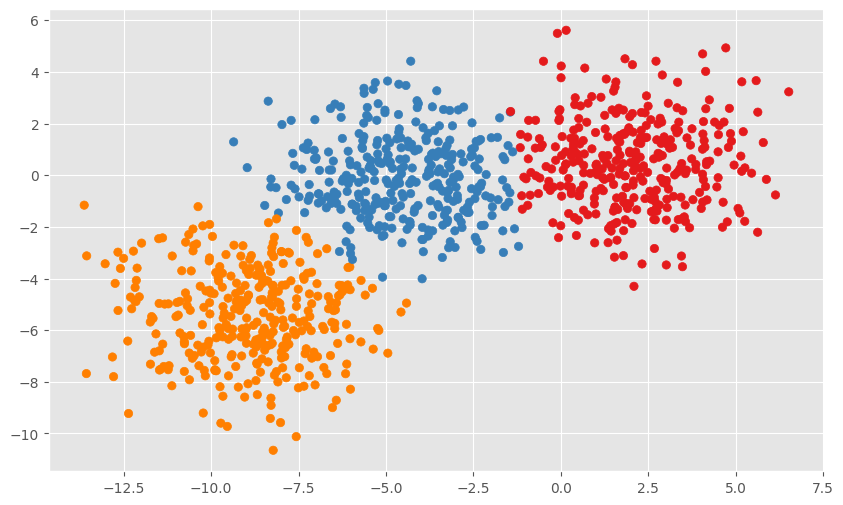

In [ ]:
y_pred = KMeans(n_clusters=3, n_init=1, init='random', max_iter=5).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred,  marker="o", cmap=cmap);

Go Back and check the impact of increasing the std. deviation of the clusters...

play around with blob numbers, cluster numbers, etc...

### More arguments to make k-means better...

* `n_init`: Number of times the k-means algorithm will be run with different centroid seeds. The final results will be the best output of `n_init` consecutive runs in terms of the total intra-cluster distance. Defaults to 10.

* `init`
 - `random` picks k random points for initial cluster seeds
 - `k-means++` (the default) uses the [k-means++](https://en.wikipedia.org/wiki/K-means%2B%2B) [algorithm](http://ilpubs.stanford.edu:8090/778/1/2006-13.pdf) to"spread out" the initial seeds: the first cluster center is chosen uniformly at random from the data points that are being clustered, after which each subsequent cluster center is chosen from the remaining data points with probability proportional to its squared distance from the point's closest existing cluster center.

 KMeans() picks smart defaults!

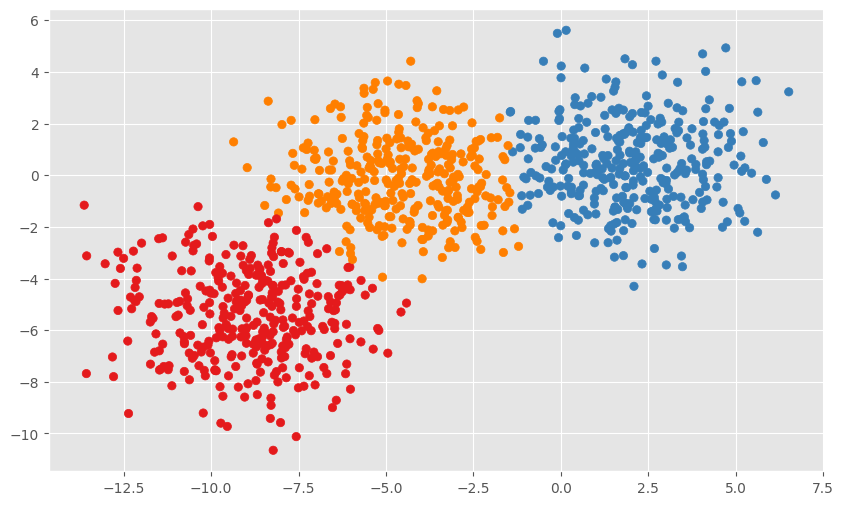

In [ ]:
# For this simple dataset using k-means++ initalization and 10 runs of k-means,
# even a max_iter of 1 yields good results.
y_pred = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=1).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred,  marker="o", cmap=cmap);


## More complicated datasets



Up to now, we've applied the algorithm only to nice, Gaussian blobs of equal size. Let's see what the algorithm does for point sets that
* vary in density and size


### Varying Density and Size

Let's start with clusters that are roughly the same size in terms of how much their data points are separated, but are not equally dense:

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


277

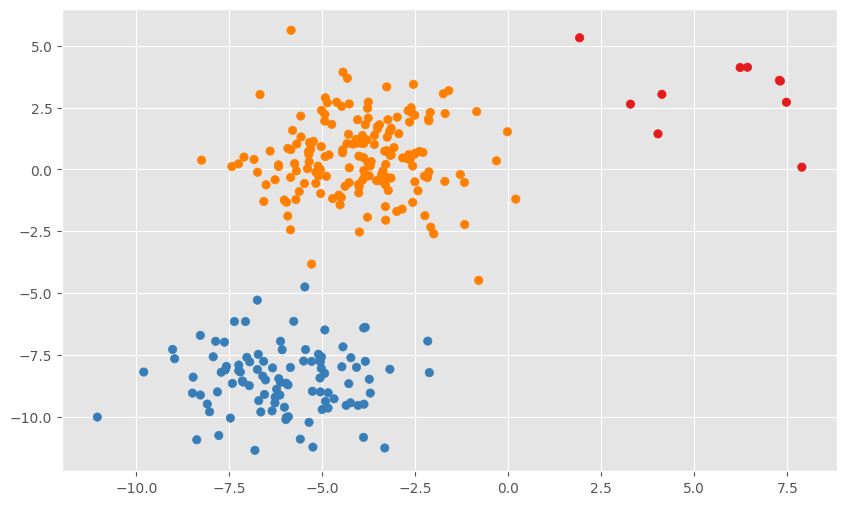

In [ ]:
X, y = make_blobs(n_samples=500, centers=3, cluster_std=1.5, random_state=17)

# Uneven density blobs
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))
y_pred = KMeans(n_clusters=3).fit_predict(X_filtered)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred,  marker="o", cmap=cmap);
len(X_filtered)

K-Means does fine for unevenly dense blobs in this case.  


Now, let's try out blobs that are spread out more:

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


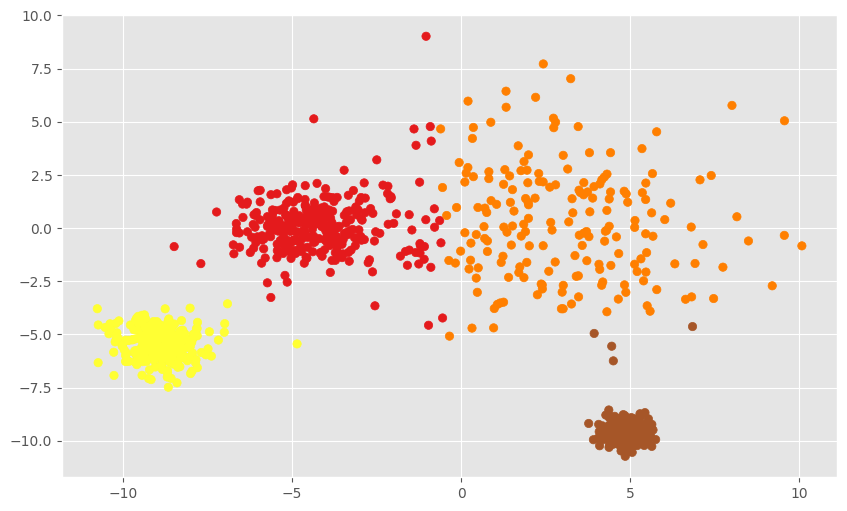

In [ ]:
X, y = make_blobs(n_samples=n_samples, centers=4, cluster_std=[0.7, 1, 3, 0.4], random_state=random_state)

# Unevenly spread blobs
y_pred = KMeans(n_clusters=4).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred,  marker="o", cmap=cmap);

Here, we seem to have some problems - because of our distance measure, some points that we'd consider as part of the "big" cluster are assigned to the denser clusters.

### Non-blob point clouds

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


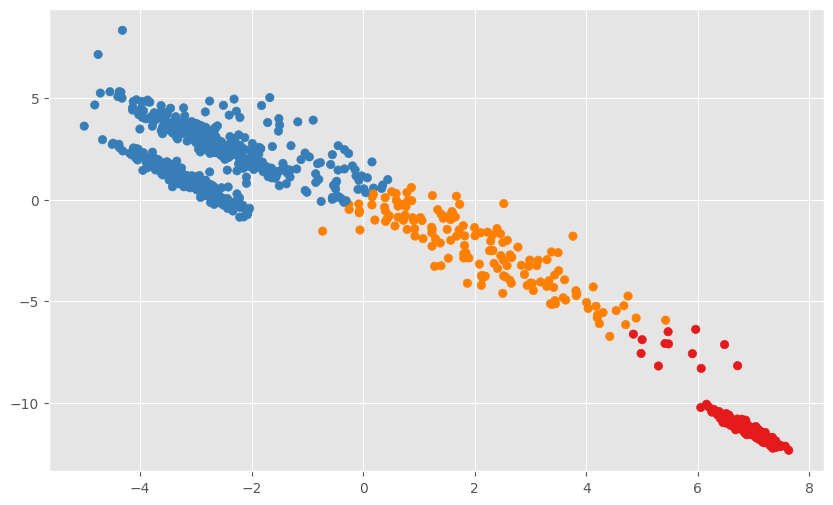

In [ ]:
# Non-blob distributed data
transformation = [[ 0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)

y_pred = KMeans(n_clusters=3).fit_predict(X_aniso)

plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred,  marker="o", cmap=cmap);

Here we see a clear weakness of k-means, it doesn't work well for anisotropic point clouds.

## Choosing k in k-means
$k$-means is very sensitive to the choice of the parameter, $k$

Here, we under-estimate *k*.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


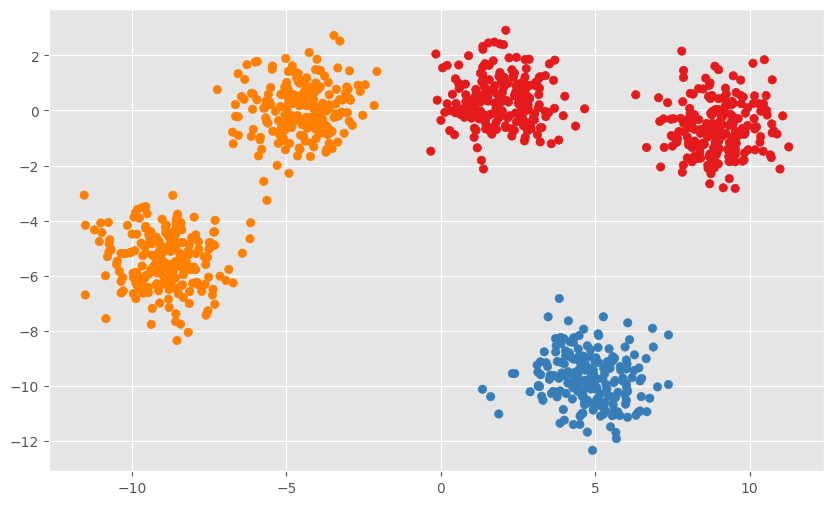

In [ ]:
X, y = make_blobs(n_samples=n_samples, centers=5, random_state=random_state)

y_pred = KMeans(n_clusters=3).fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred,  marker="o", cmap=cmap);

Over-estimation is similarily problematic.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


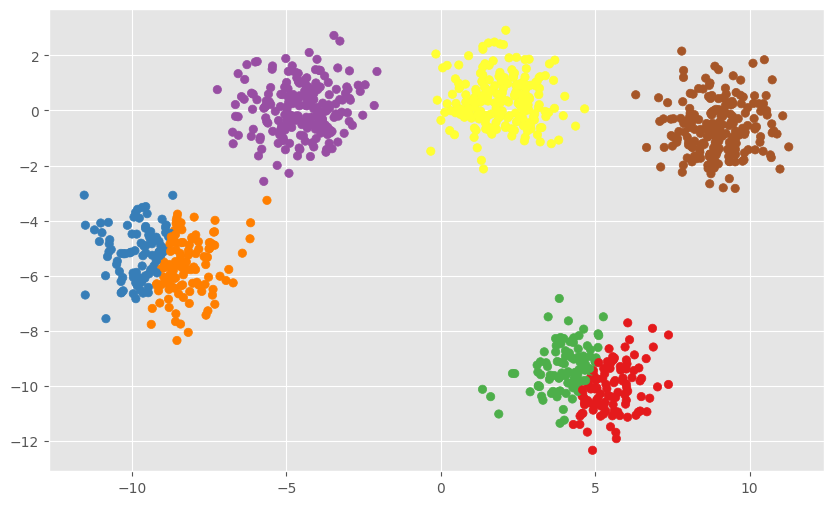

In [ ]:
X, y = make_blobs(n_samples=n_samples, centers=5, random_state=random_state)
y_pred = KMeans(n_clusters=7).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred,  marker="o", cmap=cmap);

**How do you choose K?** Ideas:

1. Visual comparison.
2. Looking for at which $k$ the total intra-cluster distance tapers off.
3. [Silhouette analysis](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)

The first method is useful when the feature vectors are lower dimensional, but it's difficult to visualize data in higher dimensions. Let's consider the other two ideas.

### Analyzing Change in Intra-Cluster Distance

We can run K-Means for different Ks and plot the intra-cluster distance.

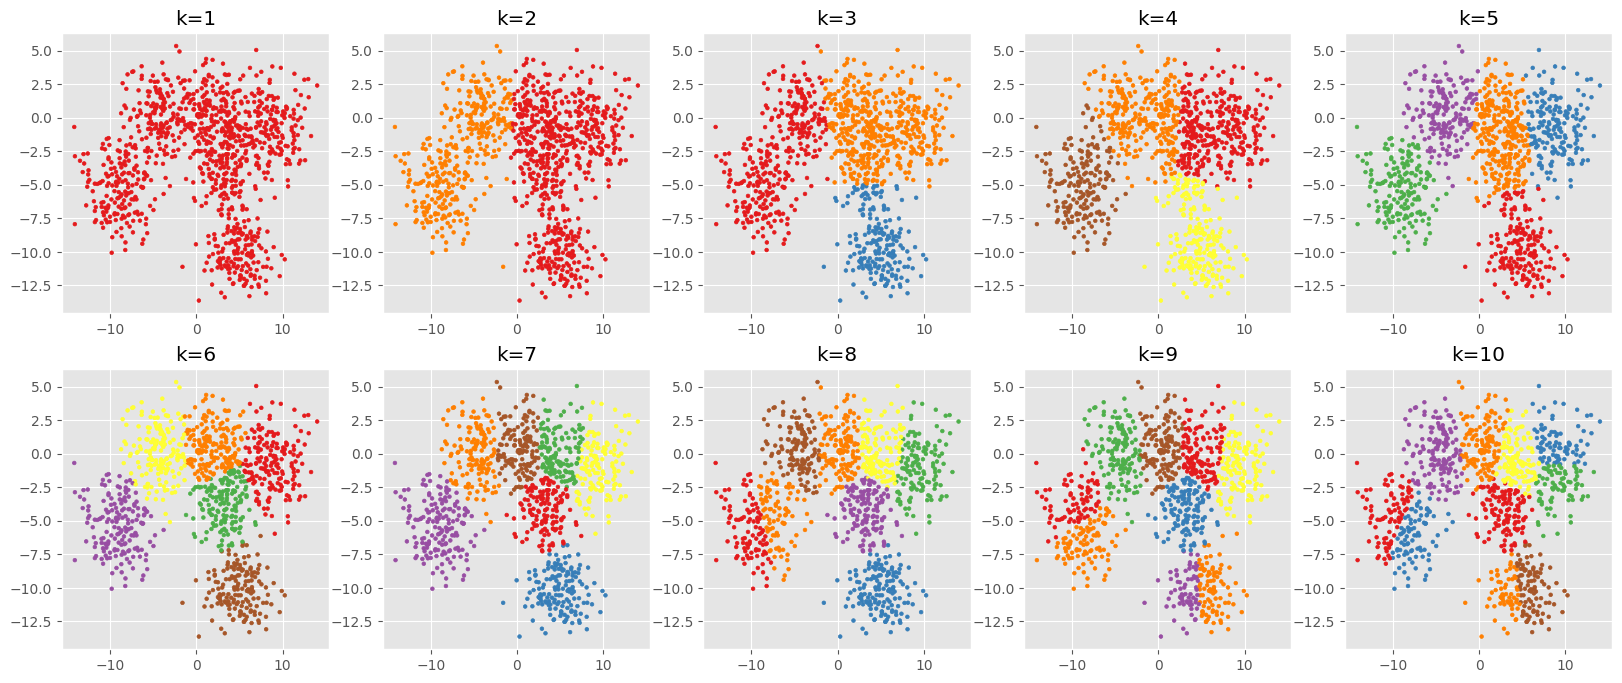

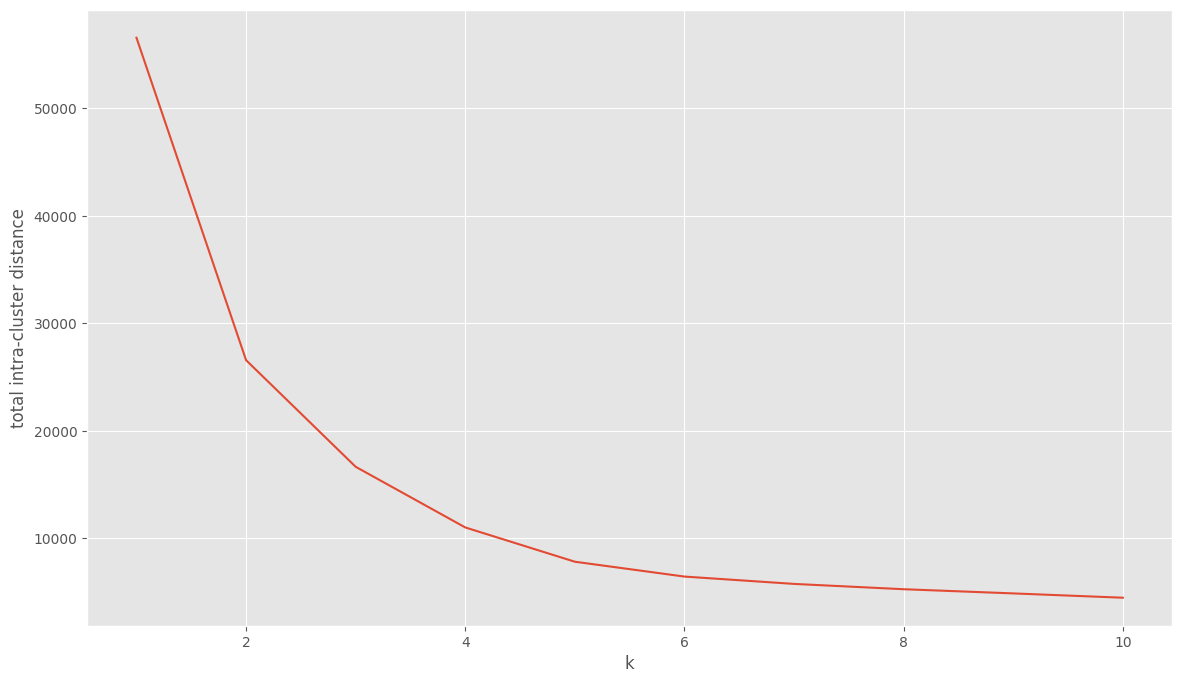

In [ ]:
# clustering for k = 1 to k = 10


X, y = make_blobs(n_samples=n_samples, centers=5, cluster_std=1.0, random_state=random_state)
#X, y = make_blobs(n_samples=n_samples, centers=4, cluster_std=[1.7, 1, 3, 1.4], random_state=random_state)
#X, y = make_blobs(n_samples=n_samples, centers=6, cluster_std=[2,2,2,2,2,2], random_state=random_state)


ks = range(1,11)
scores = []

fig, axs = plt.subplots(2,5, figsize=(20, 8))

for k in ks:
    model = KMeans(n_clusters=k,n_init=10)
    y_pred = model.fit_predict(X)
    scores.append(-model.score(X))

    subplot = axs[int((k-1)/5)][(k-1)%5]
    subplot.scatter(X[:, 0], X[:, 1], c=y_pred,  marker="o", cmap=cmap, s=7);
    subplot.set_title("k="+str(k))


fig = plt.figure(figsize=(14, 8))
plt.plot(ks, scores)
plt.ylabel('total intra-cluster distance')
plt.xlabel('k')
plt.show()

We can see that the total intra-cluster distance is large for $k = 1$ and decreases as we increase $k$, until $k=5$, after which it tapers of and gets only marginally smaller. This indicates that $k=5$ is a good choice.  This is referred to as the "elbow" in the plot.

Most real-world data sets do not have a well-defined elbow!


Try this with increasing cluster_std!!!!